<a href="https://colab.research.google.com/github/callmeAyanda/Machine-Learning/blob/main/Gold_AskingPricePrediction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

exploring the dataset

In [2]:
data = pd.read_csv('Gold Futures Historical Data.csv')
data

,Date,Price,Open,High,Low,Vol.,Change %
0,10/21/2024,"2,739.90","2,738.70","2,755.30","2,736.00",NaN,0.04%
1,10/20/2024,"2,738.70","2,736.85","2,740.00","2,734.70",NaN,0.32%
2,10/18/2024,"2,730.00","2,707.80","2,737.80","2,707.30",178.96K,0.83%
3,10/17/2024,"2,707.50","2,690.40","2,712.70","2,688.20",181.82K,0.60%
4,10/16/2024,"2,691.30","2,679.50","2,702.50","2,674.90",156.88K,0.46%
...,...,...,...,...,...,...,...
1042,10/07/2020,"1,890.80","1,882.60","1,902.40","1,877.10",188.59K,-0.94%
1043,10/06/2020,"1,908.80","1,917.80","1,927.00","1,878.20",219.44K,-0.59%
1044,10/05/2020,"1,920.10","1,910.90","1,924.90","1,891.20",177.59K,0.66%
1045,10/02/2020,"1,907.60","1,911.00","1,923.60","1,895.20",212.73K,-0.45%


In [3]:
data.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,1047,1047,1047,1047,1047,1043,1047
unique,1047,957,947,948,919,683,348
top,10/21/2024,"1,801.50","1,771.90","1,872.20","1,847.00",0.01K,0.00%
freq,1,3,3,2,3,20,18


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1047 non-null   object
 1   Price     1047 non-null   object
 2   Open      1047 non-null   object
 3   High      1047 non-null   object
 4   Low       1047 non-null   object
 5   Vol.      1043 non-null   object
 6   Change %  1047 non-null   object
dtypes: object(7)
memory usage: 57.4+ KB


copying the data to clean it

In [5]:
copied_data = data.copy()

In [6]:
copied_data['Date'] = pd.to_datetime(copied_data['Date'])

In [7]:
copied_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1047 non-null   datetime64[ns]
 1   Price     1047 non-null   object        
 2   Open      1047 non-null   object        
 3   High      1047 non-null   object        
 4   Low       1047 non-null   object        
 5   Vol.      1043 non-null   object        
 6   Change %  1047 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 57.4+ KB


cleaning the data

In [8]:
copied_data['Price'] = copied_data['Price'].str.replace(',', '').astype(float)

In [9]:
copied_data['Open'] = copied_data['Open'].str.replace(',', '').astype(float)

In [10]:
copied_data['High'] = copied_data['High'].str.replace(',', '').astype(float)

In [11]:
copied_data['Low'] = copied_data['Low'].str.replace(',', '').astype(float)

Convert 'Vol.' to numeric, handling the 'K' notation for thousands

In [12]:
copied_data['Vol.'] = copied_data['Vol.'].str.replace('K', '').astype(float) * 1000

Remove the '%' sign and convert 'Change %' to a float


In [13]:
copied_data['Change %'] = copied_data['Change %'].str.replace('%', '').astype(float)

checking for missing values

In [14]:
missing_values = copied_data.isnull().sum()
missingvalues_percentage = (missing_values / len(copied_data)) * 100
print(missing_values)
print(missingvalues_percentage)

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        4
Change %    0
dtype: int64
Date        0.000000
Price       0.000000
Open        0.000000
High        0.000000
Low         0.000000
Vol.        0.382044
Change %    0.000000
dtype: float64


filling in the missing data

In [15]:
copied_data.fillna(method='ffill' , inplace=True)

<ipython-input-15-8c559f3bc2c8>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  copied_data.fillna(method='ffill' , inplace=True)


In [16]:
copied_data

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-10-21,2739.9,2738.70,2755.3,2736.0,NaN,0.04
1,2024-10-20,2738.7,2736.85,2740.0,2734.7,NaN,0.32
2,2024-10-18,2730.0,2707.80,2737.8,2707.3,178960.0,0.83
3,2024-10-17,2707.5,2690.40,2712.7,2688.2,181820.0,0.60
4,2024-10-16,2691.3,2679.50,2702.5,2674.9,156880.0,0.46
...,...,...,...,...,...,...,...
1042,2020-10-07,1890.8,1882.60,1902.4,1877.1,188590.0,-0.94
1043,2020-10-06,1908.8,1917.80,1927.0,1878.2,219440.0,-0.59
1044,2020-10-05,1920.1,1910.90,1924.9,1891.2,177590.0,0.66
1045,2020-10-02,1907.6,1911.00,1923.6,1895.2,212730.0,-0.45


In [17]:
# Apply forward fill to fill missing values in 'Vol.'
copied_data['Vol.'] = copied_data['Vol.'].ffill()

# Check if the NaN values are filled
print(copied_data.tail())

           Date   Price    Open    High     Low      Vol.  Change %
1042 2020-10-07  1890.8  1882.6  1902.4  1877.1  188590.0     -0.94
1043 2020-10-06  1908.8  1917.8  1927.0  1878.2  219440.0     -0.59
1044 2020-10-05  1920.1  1910.9  1924.9  1891.2  177590.0      0.66
1045 2020-10-02  1907.6  1911.0  1923.6  1895.2  212730.0     -0.45
1046 2020-10-01  1916.3  1891.2  1917.9  1890.0  262090.0      1.10


visualization of the dataset

<Axes: xlabel='Date', ylabel='Price'>

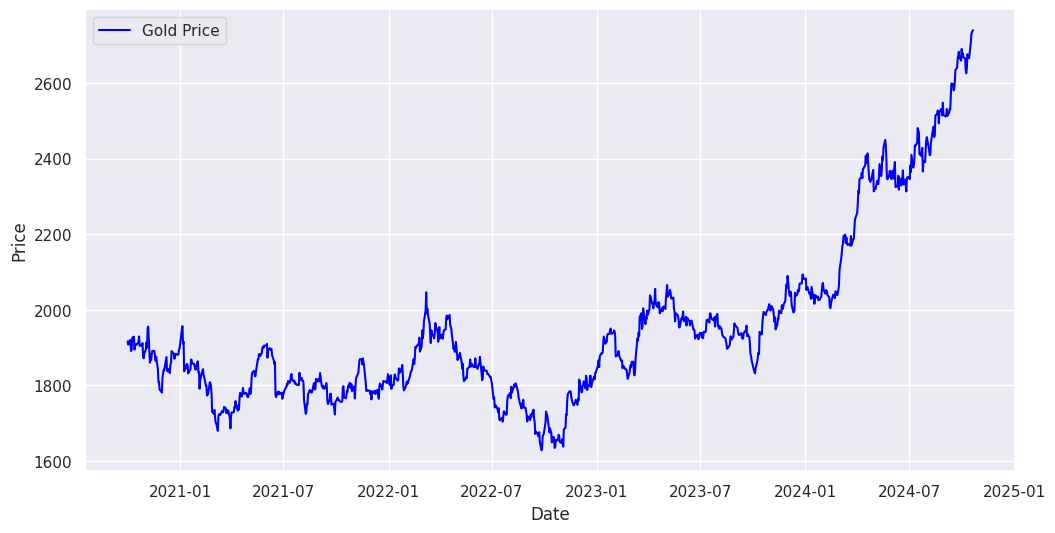

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Price', data=copied_data, label='Gold Price', color='blue')

In [19]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.9 MB/s eta 0:00:00


In [20]:
import mplfinance as mpf

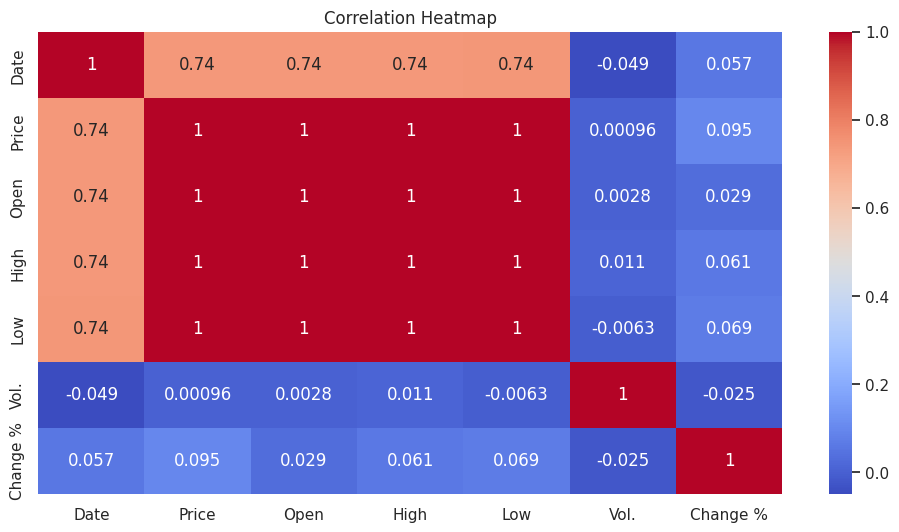

In [21]:
plt.figure(figsize=(12, 6))
sns.heatmap(copied_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='Open', ylabel='Price'>

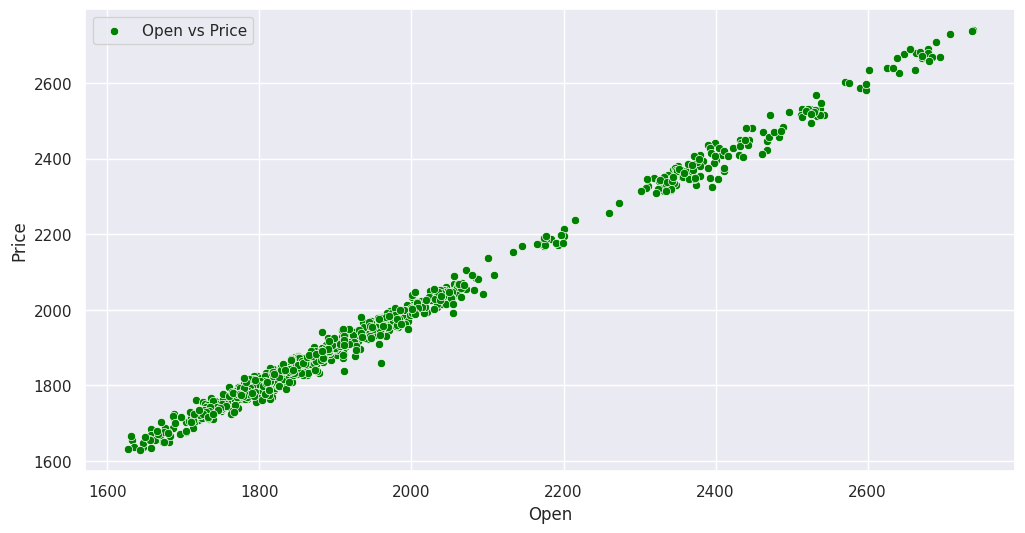

In [22]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Open', y='Price', data=copied_data, label='Open vs Price', color='green')

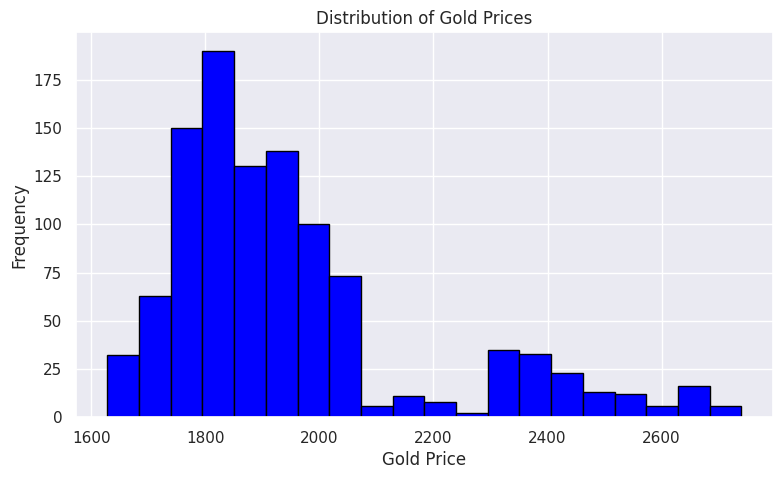

In [23]:
plt.figure(figsize=(9, 5))
plt.hist(copied_data['Price'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Gold Price')
plt.ylabel('Frequency')
plt.title('Distribution of Gold Prices')
plt.show()

In [24]:
copied_data

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-10-21,2739.9,2738.70,2755.3,2736.0,NaN,0.04
1,2024-10-20,2738.7,2736.85,2740.0,2734.7,NaN,0.32
2,2024-10-18,2730.0,2707.80,2737.8,2707.3,178960.0,0.83
3,2024-10-17,2707.5,2690.40,2712.7,2688.2,181820.0,0.60
4,2024-10-16,2691.3,2679.50,2702.5,2674.9,156880.0,0.46
...,...,...,...,...,...,...,...
1042,2020-10-07,1890.8,1882.60,1902.4,1877.1,188590.0,-0.94
1043,2020-10-06,1908.8,1917.80,1927.0,1878.2,219440.0,-0.59
1044,2020-10-05,1920.1,1910.90,1924.9,1891.2,177590.0,0.66
1045,2020-10-02,1907.6,1911.00,1923.6,1895.2,212730.0,-0.45


cleaning and gathering data information

In [25]:
# Convert columns to numeric types
copied_data['Open'] = pd.to_numeric(copied_data['Open'], errors='coerce')
copied_data['High'] = pd.to_numeric(copied_data['High'], errors='coerce')
copied_data['Low'] = pd.to_numeric(copied_data['Low'], errors='coerce')
copied_data['Price'] = pd.to_numeric(copied_data['Price'], errors='coerce')  # Assuming 'Price' is equivalent to 'Close'
copied_data['Vol.'] = pd.to_numeric(copied_data['Vol.'], errors='coerce')
copied_data['Change %'] = pd.to_numeric(copied_data['Change %'], errors='coerce')

# Extract features from the 'Date' column
copied_data['Year'] = copied_data['Date'].dt.year
copied_data['Month'] = copied_data['Date'].dt.month
copied_data['Day'] = copied_data['Date'].dt.day
copied_data['DayOfWeek'] = copied_data['Date'].dt.dayofweek

# Handle missing values by forward-filling
copied_data.fillna(method='ffill', inplace=True)

<ipython-input-25-b16f9237d437>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  copied_data.fillna(method='ffill', inplace=True)


In [26]:
copied_data.fillna(0, inplace=True)

feature scaling

In [27]:
x = copied_data[['Open', 'High', 'Low', 'Vol.', 'Change %', 'Year', 'Month', 'Day', 'DayOfWeek']]
y = copied_data['Price']

In [28]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression

In [29]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [30]:
f_values, p_values = f_regression(x_scaled, y)
print('P-values: ', p_values)
print('F-values: ', f_values)

P-values:  [0.00000000e+000 0.00000000e+000 0.00000000e+000 8.83236396e-001
 2.01216699e-003 5.26592957e-173 1.21927934e-001 7.02399044e-001
 6.03960194e-001]
F-values:  [1.96311869e+05 4.03574389e+05 5.58787276e+05 2.15806861e-02
 9.58667112e+00 1.17331373e+03 2.39626719e+00 1.46068273e-01
 2.69227660e-01]


training and testing the data to perform predictions

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [32]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [33]:
y_pred_train = regressor.predict(x_train)
y_pred_test = regressor.predict(x_test)

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

performing predictions of the past 210 samples from the dataset

In [35]:
y_pred = regressor.predict(x_test)
print("Shape of X_test:", x_test.shape)
print("Shape of y_pred:", y_pred.shape)
print("Predictions: ", y_pred)

Shape of X_test: (210, 9)
Shape of y_pred: (210,)
Predictions:  [1968.8831276  1752.44254271 1875.68002012 1954.80870784 2518.26953754
 1937.05130976 2057.17147345 1851.73265821 2348.88129338 1840.3114169
 1955.38384173 1861.31916628 2175.99221306 2044.43504849 1758.48642113
 1757.05079177 1849.29602496 1977.7377228  1765.32507203 1712.95276773
 1975.06112848 1816.97724609 1988.53995954 1748.54954886 1932.07358089
 2426.75675957 1927.951757   2438.04276561 1924.51829039 2041.20910841
 2328.69682169 1924.64476913 1764.00883333 1945.09943775 2352.56264863
 1785.39116349 1720.74229656 1912.56498862 1718.48746032 1968.76853467
 1779.22727399 1774.4130273  2000.38940271 1970.54075797 2407.18955454
 2029.42367189 2342.44470856 1926.67733839 1897.7688614  1783.15250054
 1781.27328061 1932.63406993 1787.30138862 1888.78853703 1989.81542244
 1851.58136549 2485.97455195 2032.23009345 1800.12745227 1854.89808751
 1799.14222938 1889.43408371 1722.39375247 1815.30595398 2638.58111156
 1659.35608448

In [36]:
print("Length of y_test:", len(y_test))
print("Length of y_pred:", len(y_pred))

Length of y_test: 210
Length of y_pred: 210


In [37]:
if len(y_test) == len(y_pred):
    results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print(results.head())
else:
    print("Lengths of y_test and y_pred do not match!")


     Actual    Predicted
352  1969.7  1968.883128
560  1753.0  1752.442543
874  1873.3  1875.680020
980  1956.7  1954.808708
31   2521.3  2518.269538


checking the quality of the model

In [38]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R-squared: ", r2)

r2_percentage = r2 * 100
print("R-squared Percentage: ", r2_percentage)

Mean Squared Error:  28.089016433610727
R-squared:  0.999526661442529
R-squared Percentage:  99.9526661442529


In [39]:
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print("Adjusted R-squared: ", adjusted_r2)

Adjusted R-squared:  0.9995053612074428


In [40]:
x_train_with_constant = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train_with_constant)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.769e+05
Date:                Thu, 24 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:05:53   Log-Likelihood:                -2561.9
No. Observations:                 837   AIC:                             5144.
Df Residuals:                     827   BIC:                             5191.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1952.5175      0.180   1.09e+04      0.0

In [41]:
copied_data

,Date,Price,Open,High,Low,Vol.,Change %,Year,Month,Day,DayOfWeek
0,2024-10-21,2739.9,2738.70,2755.3,2736.0,0.0,0.04,2024,10,21,0
1,2024-10-20,2738.7,2736.85,2740.0,2734.7,0.0,0.32,2024,10,20,6
2,2024-10-18,2730.0,2707.80,2737.8,2707.3,178960.0,0.83,2024,10,18,4
3,2024-10-17,2707.5,2690.40,2712.7,2688.2,181820.0,0.60,2024,10,17,3
4,2024-10-16,2691.3,2679.50,2702.5,2674.9,156880.0,0.46,2024,10,16,2
...,...,...,...,...,...,...,...,...,...,...,...
1042,2020-10-07,1890.8,1882.60,1902.4,1877.1,188590.0,-0.94,2020,10,7,2
1043,2020-10-06,1908.8,1917.80,1927.0,1878.2,219440.0,-0.59,2020,10,6,1
1044,2020-10-05,1920.1,1910.90,1924.9,1891.2,177590.0,0.66,2020,10,5,0
1045,2020-10-02,1907.6,1911.00,1923.6,1895.2,212730.0,-0.45,2020,10,2,4


predicting future values